# 0. Knihovny

In [1]:
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix, accuracy_score, f1_score
import itertools
from collections import Counter
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

np.set_printoptions(threshold=sys.maxsize)
seed = 422020

# 1. Načtení datasetu a lehké prozkoumání dat

**Notebook byl vytvořen na lokálu a následně sem nahrán. Toto rozhodnutí bylo na základě nedostatku paměti a výpočetního výkonu na platformě Deepnote. Je možné, že nebudou všechny výstupu perfektně vidět.**

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,y,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,...,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin
0,0,2,1,5,1,6,0,1,0,0,...,4,0,2,8,0,0,0,1,1,0
1,0,2,1,6,0,0,0,0,0,1,...,9,2,3,7,0,0,1,0,0,0
2,0,2,1,9,0,0,1,0,0,0,...,5,0,2,6,0,1,0,1,1,0
3,0,1,1,6,0,0,1,0,0,0,...,3,0,4,8,0,0,1,0,0,0
4,0,1,1,5,1,0,0,1,0,0,...,4,3,1,2,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,0,1,1,2,1,0,1,0,0,0,...,8,2,2,7,1,1,0,0,1,0
595208,0,5,1,10,0,0,0,0,1,0,...,11,0,4,12,0,1,1,0,0,0
595209,0,1,1,7,0,0,0,1,0,0,...,8,0,4,9,0,0,0,0,1,0
595210,1,7,1,5,1,1,0,0,0,1,...,2,0,5,10,0,1,1,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   y             595212 non-null  int64  
 1   xind_01       595212 non-null  int64  
 2   xind_02_cat   595212 non-null  int64  
 3   xind_03       595212 non-null  int64  
 4   xind_04_cat   595212 non-null  int64  
 5   xind_05_cat   595212 non-null  int64  
 6   xind_06_bin   595212 non-null  int64  
 7   xind_07_bin   595212 non-null  int64  
 8   xind_08_bin   595212 non-null  int64  
 9   xind_09_bin   595212 non-null  int64  
 10  xind_10_bin   595212 non-null  int64  
 11  xind_11_bin   595212 non-null  int64  
 12  xind_12_bin   595212 non-null  int64  
 13  xind_13_bin   595212 non-null  int64  
 14  xind_14       595212 non-null  int64  
 15  xind_15       595212 non-null  int64  
 16  xind_16_bin   595212 non-null  int64  
 17  xind_17_bin   595212 non-null  int64  
 18  xind

In [5]:
data.nunique()

y                   2
xind_01             8
xind_02_cat         5
xind_03            12
xind_04_cat         3
xind_05_cat         8
xind_06_bin         2
xind_07_bin         2
xind_08_bin         2
xind_09_bin         2
xind_10_bin         2
xind_11_bin         2
xind_12_bin         2
xind_13_bin         2
xind_14             5
xind_15            14
xind_16_bin         2
xind_17_bin         2
xind_18_bin         2
xreg_01            10
xreg_02            19
xreg_03          5013
xcar_01_cat        13
xcar_02_cat         3
xcar_03_cat         3
xcar_04_cat        10
xcar_05_cat         3
xcar_06_cat        18
xcar_07_cat         3
xcar_08_cat         2
xcar_09_cat         6
xcar_10_cat         3
xcar_11_cat       104
xcar_11             5
xcar_12           184
xcar_13         70482
xcar_14           850
xcar_15            15
xcalc_01           10
xcalc_02           10
xcalc_03           10
xcalc_04            6
xcalc_05            7
xcalc_06           11
xcalc_07           10
xcalc_08  

In [6]:
np.shape(data)

(595212, 58)

# Use 2 binning methods (on features of your choice, with your choice of parameters) and comment on its effects on classification performance. (3 points)

Ze všeho nejdříve si rozdělíme data na trénovací a testovací množinu v poměru 60:40.

In [7]:
y = list(data['y'])
x = data.drop(['y'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=seed)
print('x_train shape = ' + format(x_train.shape) + '\n' + 'x_test shape = ' + format(x_test.shape))

x_train shape = (357127, 57)
x_test shape = (238085, 57)


Jako model jsem si zvolil RandomForest, protože už z VZD vím, že je poměrně jednoduchý ale zároveň dává poměrně dobré výsledky.

Použiji kód ze cvičení na zobrazení confusion matice pro náš dataset.

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

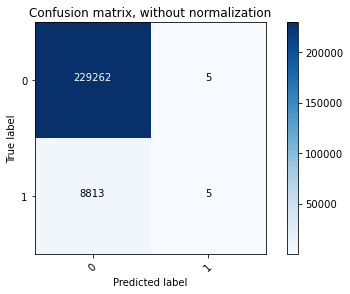

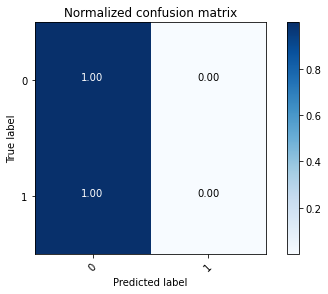

In [9]:
np.set_printoptions(precision=2)
class_names = [0,1]

clf = RandomForestClassifier()
y_pred = clf.fit(x_train, y_train).predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [10]:
print('Accuracy: ', accuracy_score(y_test, y_pred),'\nF1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.9629628074007183 
F1-score:  0.0011327594019030357


Tak výlsedek teda nic moc. 

Vyzkoušíme teda veškeré příznaky a podíváme se, které jsou vhodné pro binning.

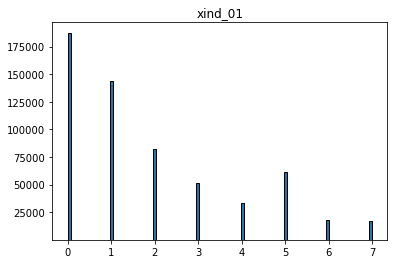

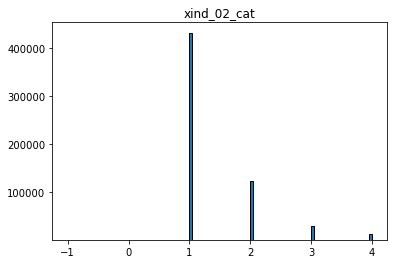

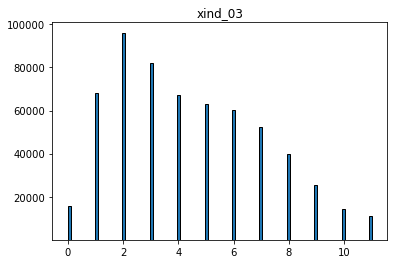

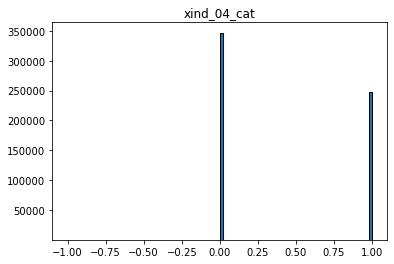

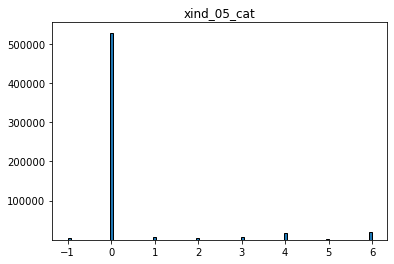

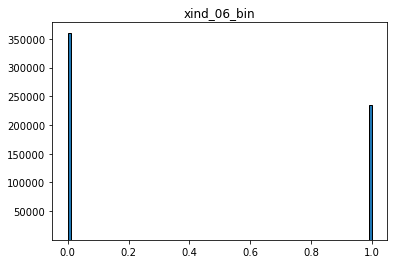

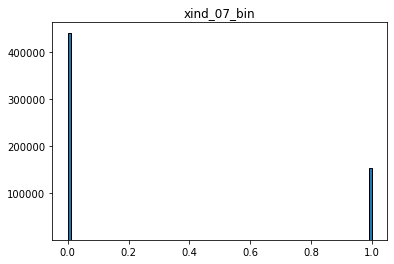

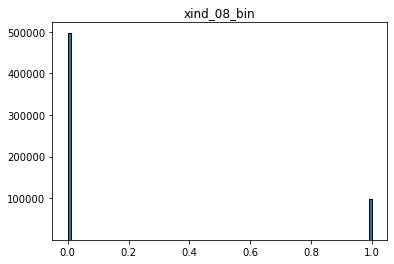

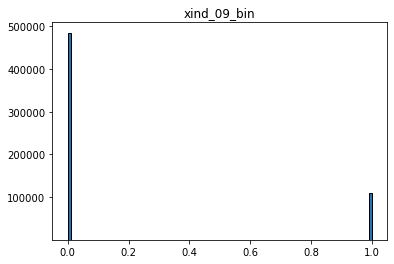

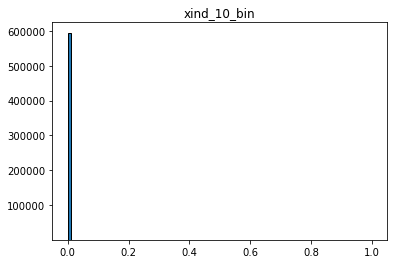

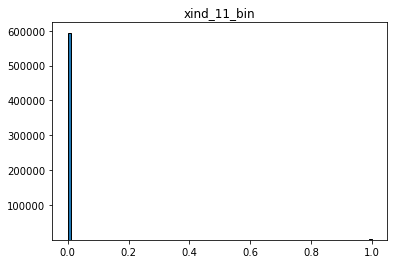

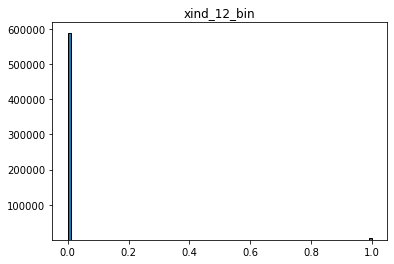

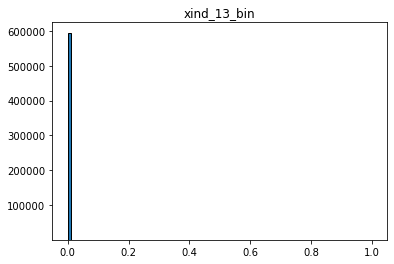

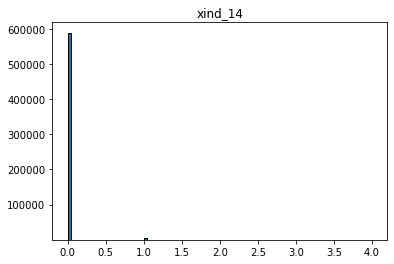

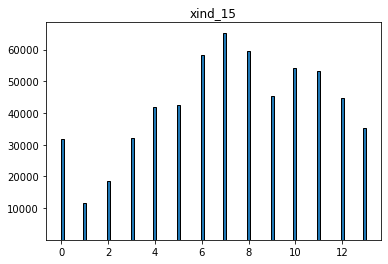

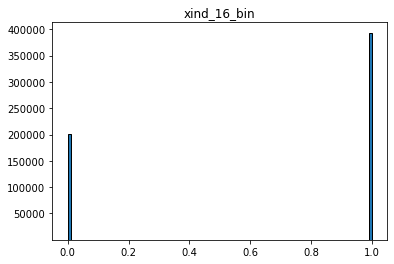

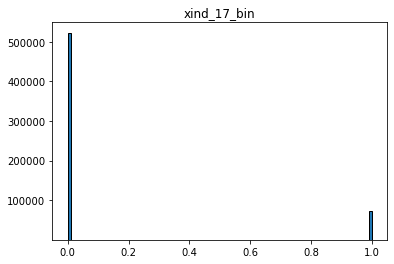

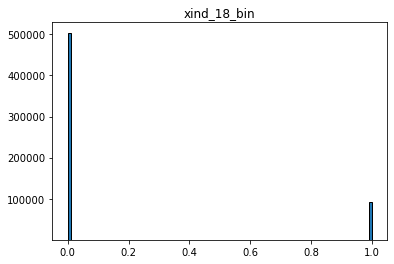

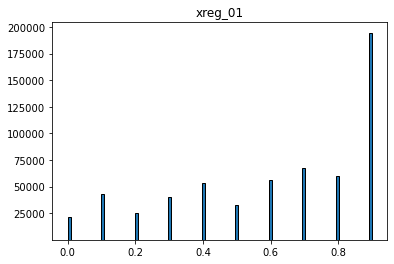

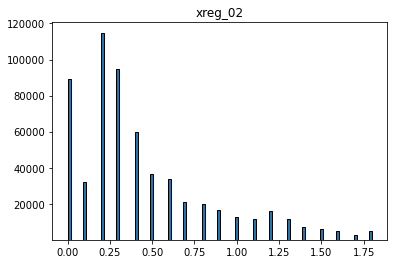

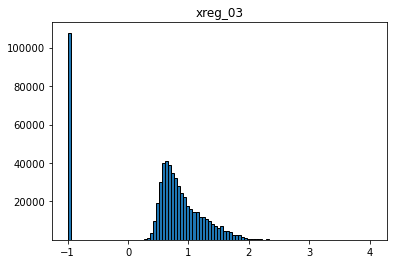

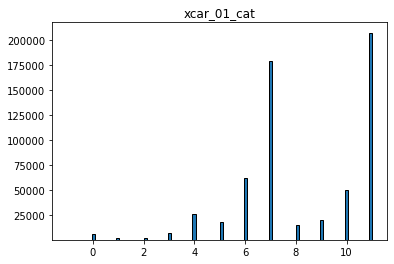

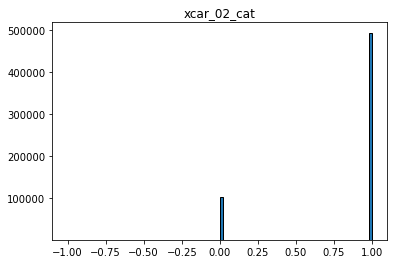

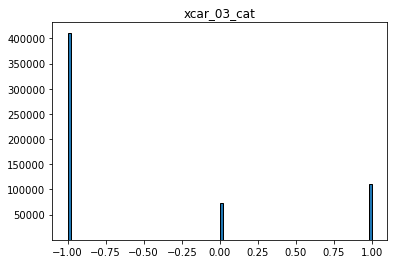

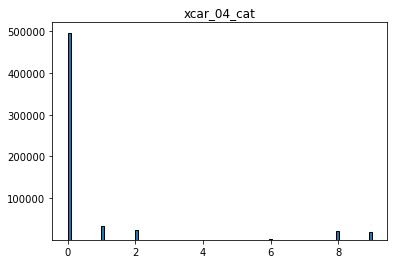

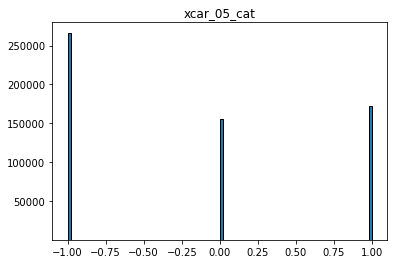

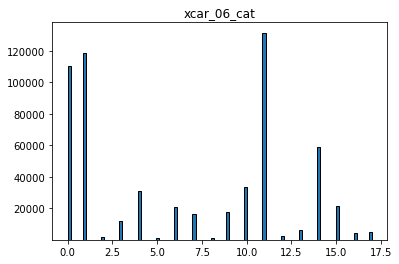

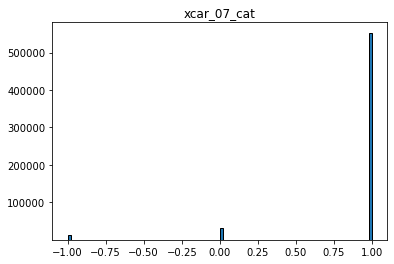

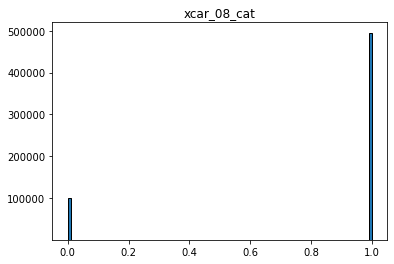

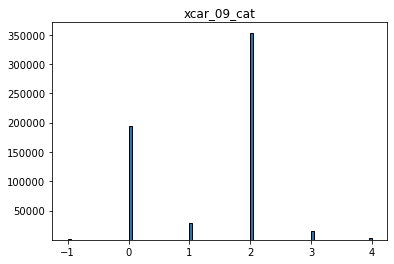

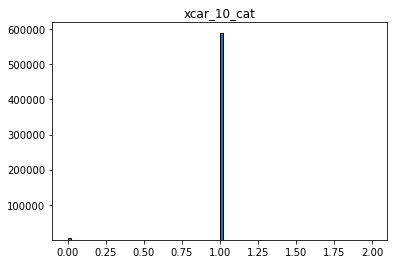

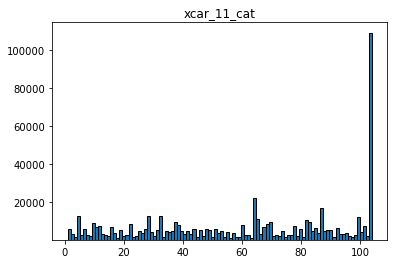

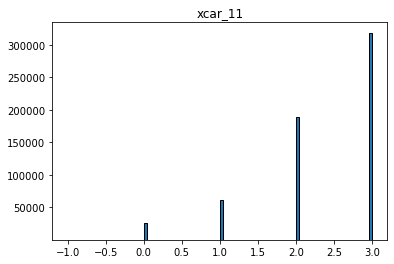

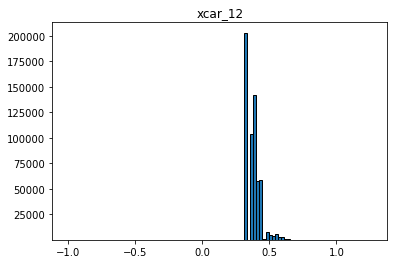

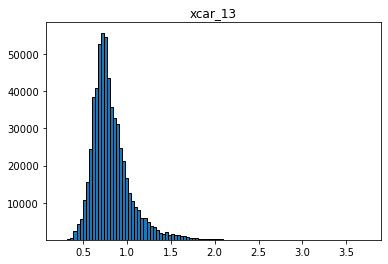

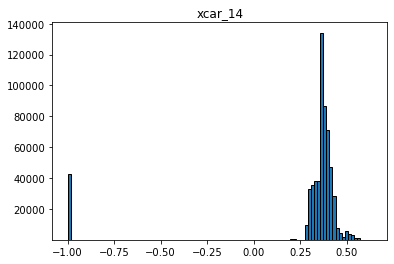

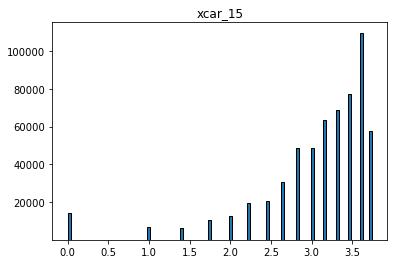

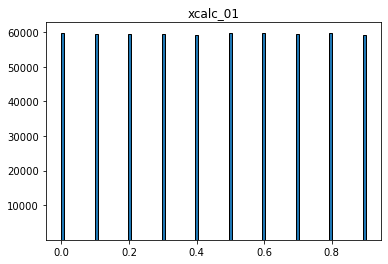

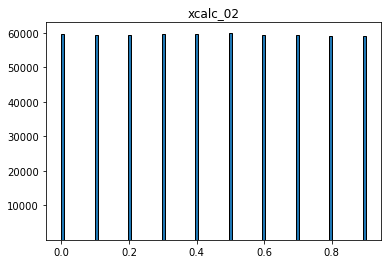

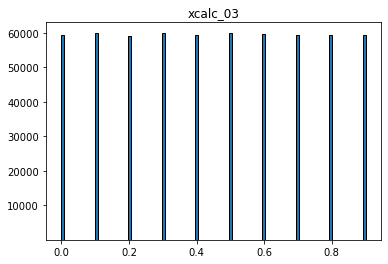

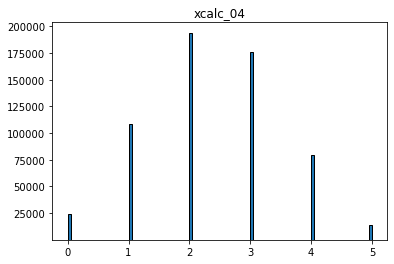

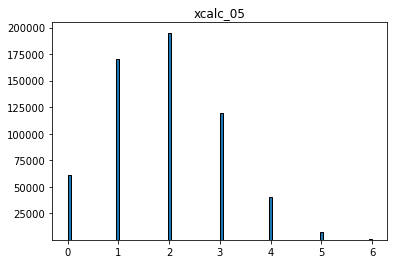

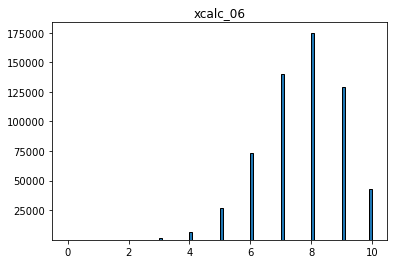

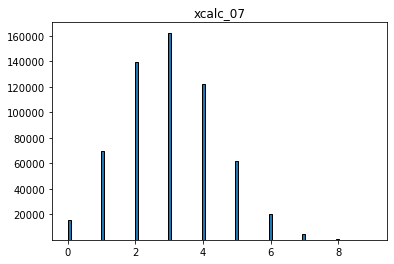

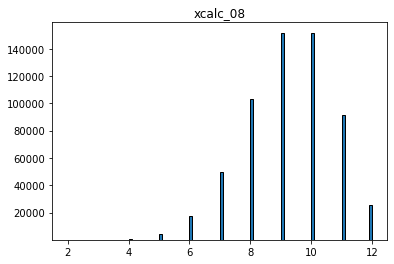

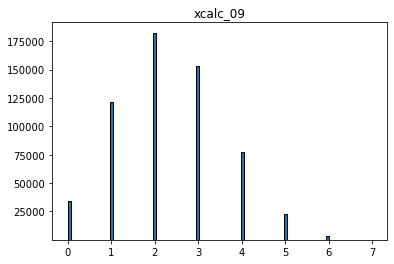

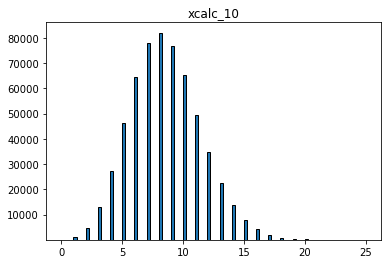

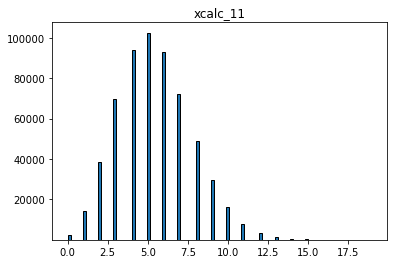

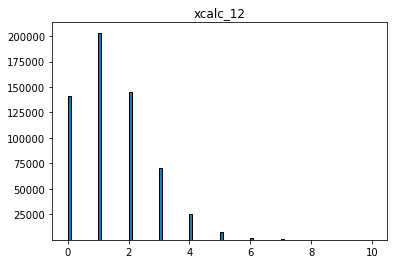

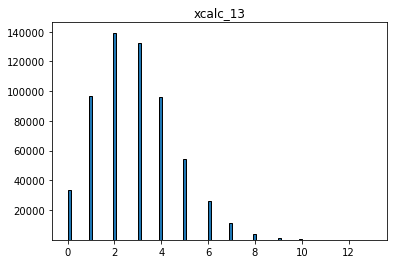

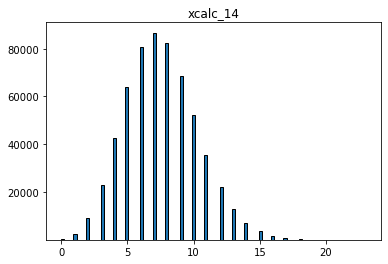

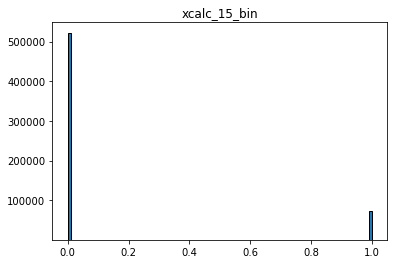

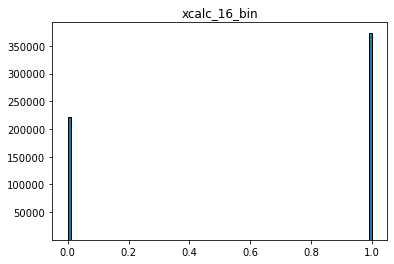

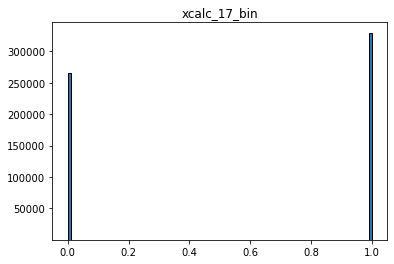

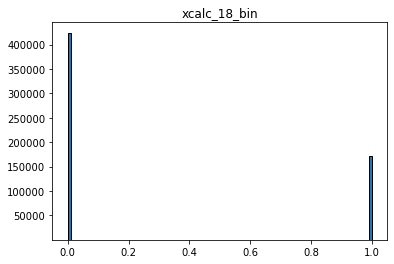

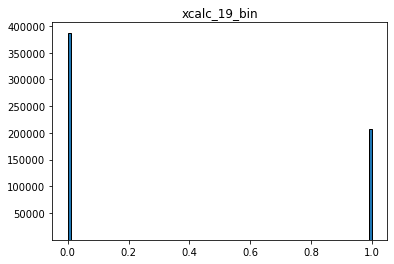

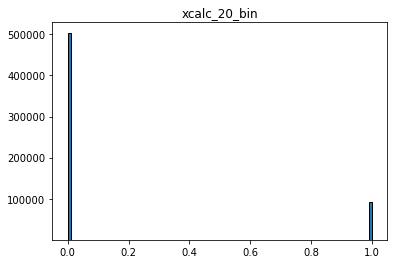

In [11]:
for feature in x_train:
    plt.hist(data[feature], edgecolor='black', bins=100)
    plt.ylim(data[feature].max())
    plt.title(feature)
    plt.show()

Můžeme vidět, že příznaky **"xcar_14"** a **"xreg_03"** mají souvislí data a chybějící prvky, zkusíme na ně aplikovat Binning.

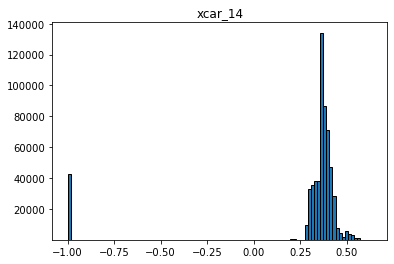

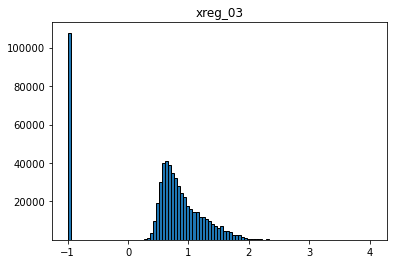

In [12]:
for feature in ['xcar_14','xreg_03']:
    plt.hist(data[feature], edgecolor='black', bins=100)
    plt.ylim(data[feature].max())
    plt.title(feature)
    plt.show()

4    246008
3    158902
1    107772
5     73836
6      8359
7       279
2        25
8        23
9         8
Name: xreg_03_new, dtype: int64

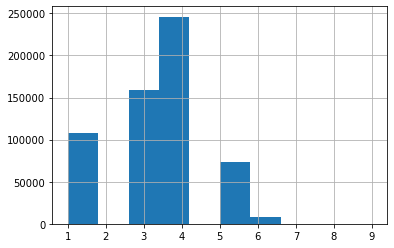

In [13]:
# example of bins with equal width

bins_names = [1, 2, 3, 4, 5, 6, 7, 8, 9]
data['xreg_03_new'], bins1 = pd.cut(data['xreg_03'], 9, labels=bins_names, retbins=True)
data.xreg_03_new.hist()
data.xreg_03_new.value_counts()

2    111901
1    101110
5     99740
6     98213
3     92712
4     91536
Name: xcar_14_new, dtype: int64

[-1.    0.32  0.36  0.37  0.39  0.41  0.64]


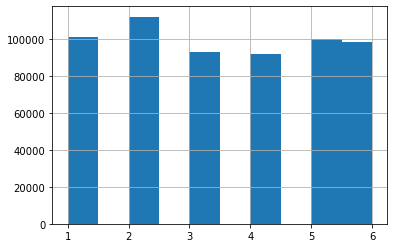

In [14]:
# example of bins with equal depth

bins_names = [1, 2, 3, 4, 5, 6]
data['xcar_14_new'], bins2 = pd.qcut(data['xcar_14'], 6, labels=bins_names, retbins=True)
data.xcar_14_new.hist()
display(data.xcar_14_new.value_counts())
print(bins2)


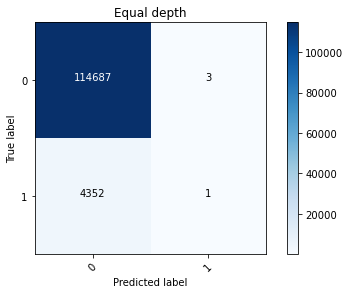


Accuracy:  0.9634165805633259 
F1-score:  0.00045903144365389025


In [15]:
x = data.drop(['y','xcar_14'],axis=1)
y = list(data['y'])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=seed)

clf = RandomForestClassifier(random_state=seed)
y_pred = clf.fit(x_train, y_train).predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred) 

np.set_printoptions(precision=2)
class_names = [0,1] # for printing purposes only
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Equal depth')
print('\nAccuracy: ', accuracy_score(y_test, y_pred),'\nF1-score: ', f1_score(y_test, y_pred))

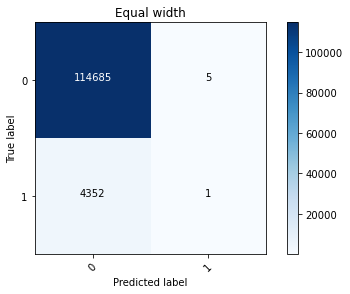


Accuracy:  0.9633997799114605 
F1-score:  0.0004588208304657031


In [16]:
x = data.drop(['y','xreg_03'],axis=1)
y = list(data['y'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=seed)

clf = RandomForestClassifier(random_state=seed)
y_pred = clf.fit(x_train, y_train).predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred) 

np.set_printoptions(precision=2)
class_names = [0,1] # for printing purposes only
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Equal width')
print('\nAccuracy: ', accuracy_score(y_test, y_pred),'\nF1-score: ', f1_score(y_test, y_pred))

Malinko jsme si pomohli, žádná velká změna to ale není.

# 3. Use at least 2 other data balancing techniques of your choice on the dataset and comment the classification results. Just copied code from tutorial 4 will not be accepted. (6 points)

##### Under and oversampling

Chtěl jsem vyzkoušet UnderSampling. Bohužel po 45 minutách to spadne na nedostatek paměti, budu si muset proadit jinak.

In [17]:
data = data.drop('xreg_03_new', axis=1)
data = data.drop('xcar_14_new', axis=1)

y = list(data['y'])
x = data.drop(['y'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=seed)
print('x_train shape = ' + format(x_train.shape) + '\n' + 'x_test shape = ' + format(x_test.shape))

x_train shape = (357127, 57)
x_test shape = (238085, 57)


![Picture title](image-20221127-115005.png)

![Picture title](image-20221127-115026.png)

Našel jsem na jednom webu https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf jinou metodu. Použiji jí.

In [18]:
# instantiating over and under sampler
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)

# first performing oversampling to minority class
x_over, y_over = over.fit_resample(x_train, y_train)
print(f"Oversampled: {Counter(y_over)}")

# now to comine under sampling 
x_combined_sampling, y_combined_sampling = under.fit_resample(x_over, y_over)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 344251, 1: 172125})
Combined Random Sampling: Counter({0: 215156, 1: 172125})


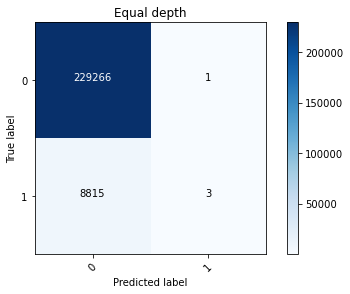


Accuracy:  0.9629712077619338 
F1-score:  0.0006801178871004306


In [19]:
clf = RandomForestClassifier(random_state=seed)
y_pred = clf.fit(x_combined_sampling, y_combined_sampling).predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred) 

np.set_printoptions(precision=2)
class_names = [0,1] # for printing purposes only
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Equal depth')
print('\nAccuracy: ', accuracy_score(y_test, y_pred),'\nF1-score: ', f1_score(y_test, y_pred))

Změna se tedy skoro vůbec neprojevila.

původní skóre:
* Accuracy:  0.9629586072201105 
* F1-score:  0.0009063101846607

##### SMOTE - Synthetic Minority Oversampling Technique

In [20]:
y = list(data['y'])
x = data.drop(['y'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state=seed)
print('x_train shape = ' + format(x_train.shape) + '\n' + 'x_test shape = ' + format(x_test.shape))

x_train shape = (357127, 57)
x_test shape = (238085, 57)


In [21]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

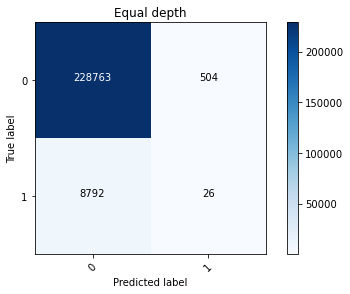


Accuracy:  0.960955121070206 
F1-score:  0.005562687205819426


In [22]:
clf = RandomForestClassifier(random_state=seed)
y_pred = clf.fit(x_smote, y_smote).predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred) 

np.set_printoptions(precision=2)
class_names = [0,1] # for printing purposes only
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Equal depth')
print('\nAccuracy: ', accuracy_score(y_test, y_pred),'\nF1-score: ', f1_score(y_test, y_pred))

Vidíme, že nám SMOTE "hodně" pomohl. Není to žádná sláva, ale je to zatím nejlepší výsledek ze všech doposud dosažených. 

# 4. Run all classification tests at least three times - once for unbalanced original data, twice for balanced data (try at least 2 balancing techniques), compare those results and discuss (give a comment). (5 points)

- Binning v podstatě nepomohl, někdy dokonce zhoršil klasifikaci - přidal chyby 1. druhu.
- Random undersampling také trošku pomohl, né něják výrazně. Aspoň nezatáhl mnoho chyb 1. druhu jako zbytek metod.
- SMOTE pomohl ze všech nejvíce, ale zároveň i uškodil v chybě 1. druhu a to výrazně.

každopádně žádná metoda nepomohla natolik, abych jí mohl prohlásit za úspěšnou.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=38f1b2b5-5f6c-4220-bf47-967636f9bd8c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>